# Part 3: Inferential Statistcis

How to draw conclusions about a large group based on a small part of it

## From Sample to Population

- population: entire group of individuals or items you are studying
- sample: a smaller, manageable subset of the population that you actually collect data from
- inference: making conclusions about something based on something else

- example: cannot measure the height of everyone in Germany, select 1000 random adults and infer from those

## Questions we face:

- How can we select a sample that is representative of the population?
- How large does the sample need to be?
- How reliable are our conclusions?

## Central Limit Theorem

### Intuitive Explanation: Calculate average income of people in California

- income distribution is usually skewed, not normally distributed (sadly!)
- cannot ask everyone, so we ask a random sample of 100 people, their average income is X1
- now take another random sample of 100 people (the people before were "put back" into the population) and calculate their average outcome, X2
- repeat over and over again
- we now have a collection of sample averages, X1, X2, X3...
- *CLT magic* the distribution of the samples will tend to be normally distributed
- the larger the sample size you draw, the more normal the distribution will look

In [35]:
# using a bigger dataset
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing(return_X_y=True, as_frame=True)
df = dataset[0]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


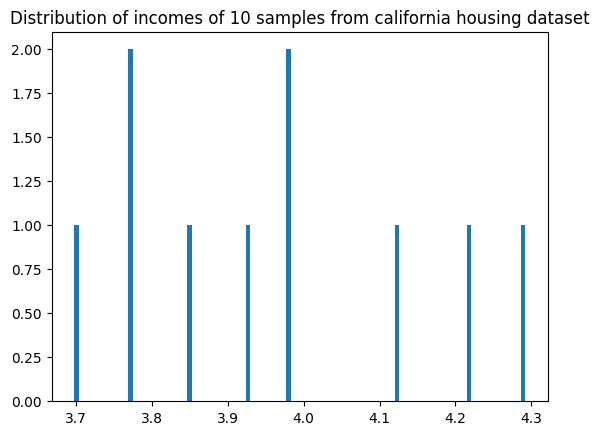

In [38]:
import matplotlib.pyplot as plt
means = []
total_samples = 10
for i in range(total_samples):
    means.append(df.MedInc.sample(100).mean())
_ = plt.hist(means, bins=100)
_ = plt.title(f'Distribution of incomes of {total_samples} samples from california housing dataset')

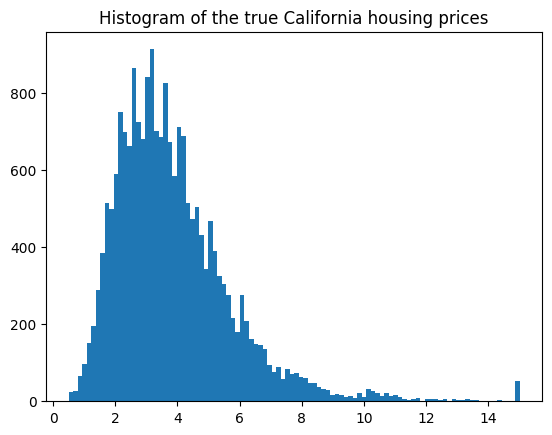

In [37]:
plt.hist(df.MedInc, bins=100)
_ = plt.title(f'Histogram of the true California incomes')

## Why is CLT important?

- allows us to use normal distribution even though data is not normally distributed
- helps estimate population mean of skewed populations

## Standard Error of the Mean

- this is the standard deviation (spread) of the distribution of sample means
- expected variability in the sample means if we were to take many samples
- NOT the standard deviation of the original data!

## Point Estimate

- a single number that estimates a population parameter (e.g. sample mean)
- how close is that number to the true number?
- example: sample mean height is 172 cm, how close is that to the true height of the entire population?

## Confidence Intervals

- help quantify the uncertainty of the point estimate
- range of values within which we are reasonably confident the true population parameter (eg mean) lies
- usually quantified: 95% confidence interval
- !!!95% confidence interval does NOT mean there is a 95% chance the true mean is in the confidence interval!!!
- 95% confidence interval means we are 95% confident that our method of creating the interval captures the true mean

example: 95% confidence interval for average customer spending is 50€ to 70€, what does it say about the true average spending?

## Factors Affecting Interval Width

- sample size (more samples -> narrower intervals)
- variability (more variability -> wider intervals)
- confidence level (higher confidence -> wider interval)

## Hypothesis Testing

- "courtroom" for the data
- decide between two competing statments (hypotheses)
- example: new drug against cold - does it work?

### Null vs Alternative Hypothesis


#### Null Hypothesis (H0):
- default assumption (status quo)
- usually states there is no effect / difference / relationship (hence null)
- assumed to be true unless there is strong evidence against it
- drug example: "H0: The new drug has no effect, it is the same as a placebo"

#### Alternate Hypothesis (Ha or H1)
- what we are trying to prove
- states that effect / difference / relationship exists
- drug example: "H1: The new drug has an effect on cold length"
- we do not try to "prove" H1!

#### The Goal
- gather evidence to see if we can reject the null hypothesis
- if we reject H0, it means that there is enough evidence to support Ha
- jury analogy: assume innocent (H0) until proven guilty (Ha) - we don't prove innocence, we show evidence against it!

#### Type I Error
- falsely rejecting a null hypothesis

### P-Value

- most crucial and often misunderstood concept of hypothesis testing!
- intuitive explanation: probability of observing sample data if the null hypothesis was actually true
- drug example: "How likely are we to see a difference this big (or bigger) in the cold duration between the drug group and the placebo group purely by chance?"

- small p-value: observed data very unlikely to happen if H0 is true -> reject null hypothesis
- large p-value observed data is uqite likely to happen even if H0 was true -> fail to reject null hypothesis

#### what is small/large?

### Significance Level (α)

- threshold for deciding if p-value is "small enough"
- decided BEFORE the experiment
- tolerance for "making a mistake" (type I error)
- most common value: 0.05 (5%) -> reject H0 if p <= 0.05
- can be larger depending on context
- "tolerance of making a mistake"
- α is decided; p is calculated

### Clinical Significance Level

- effects can be significant but not clinically significant
- "no real impact"
- mostly for clinical trials
- also decided BEFORE the experiment

## Recap

- population vs sample
- central limit theorem
- sample mean
- confidence intervals
- hypothesis testing
- null vs alternative hypothesis
- p-value and significance level

## Questions?